In [29]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [12]:
play_tw_sala = pd.read_csv("/Users/emma/Desktop/nba_2017_players_with_salary_wiki_twitter.csv");play_tw_sala.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [13]:
play_tw_sala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 42 columns):
Unnamed: 0                239 non-null int64
Rk                        239 non-null int64
PLAYER                    239 non-null object
POSITION                  239 non-null object
AGE                       239 non-null int64
MP                        239 non-null float64
FG                        239 non-null float64
FGA                       239 non-null float64
FG%                       239 non-null float64
3P                        239 non-null float64
3PA                       239 non-null float64
3P%                       232 non-null float64
2P                        239 non-null float64
2PA                       239 non-null float64
2P%                       239 non-null float64
eFG%                      239 non-null float64
FT                        239 non-null float64
FTA                       239 non-null float64
FT%                       237 non-null float64
ORB       

In [17]:
subset = play_tw_sala[["PLAYER","FG%", "SALARY_MILLIONS","MP","AST"]]
subset.head()

,PLAYER,FG%,SALARY_MILLIONS,MP,AST
0,Russell Westbrook,0.425,26.50,34.6,10.4
1,James Harden,0.440,26.50,36.4,11.2
2,Anthony Davis,0.505,22.12,36.1,2.1
3,DeMarcus Cousins,0.452,16.96,34.2,4.6
4,Damian Lillard,0.444,24.33,35.9,5.9


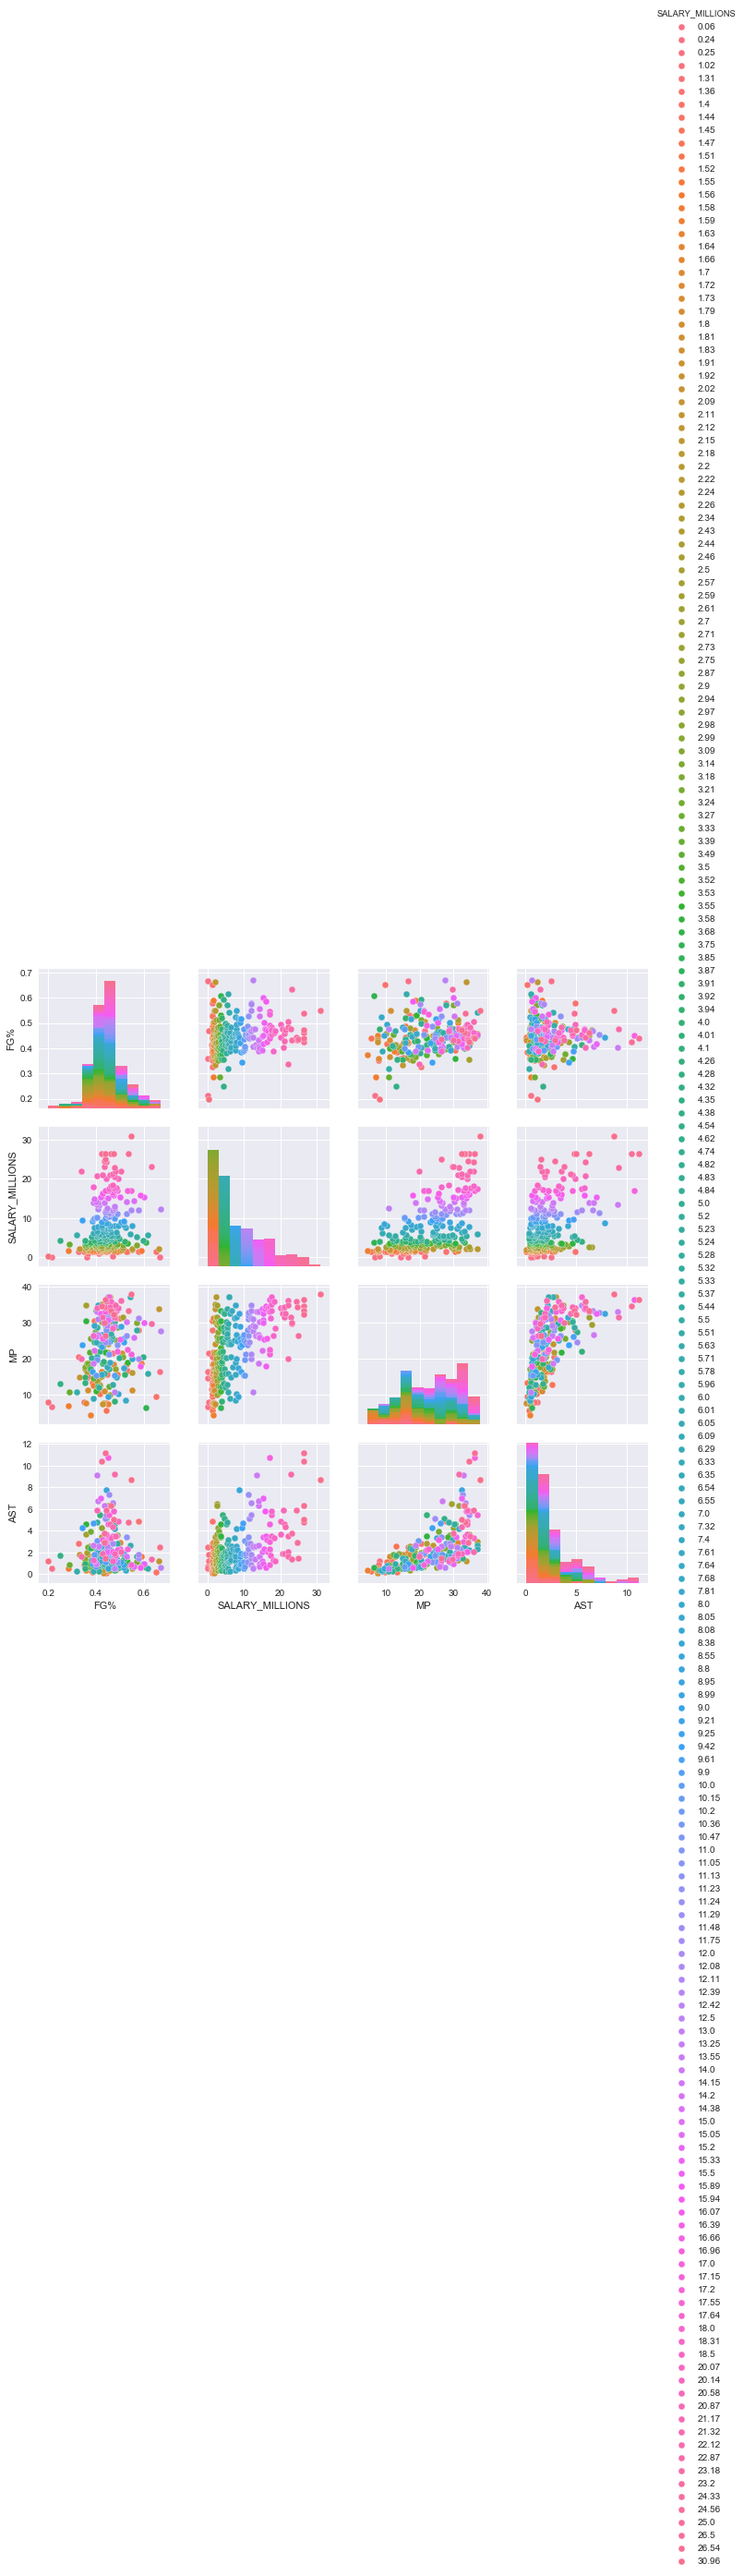

In [20]:

sns.pairplot(subset, hue="SALARY_MILLIONS")

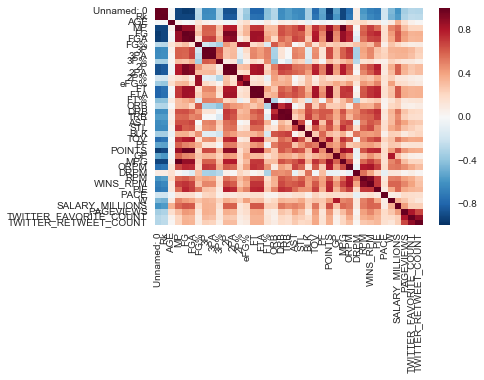

In [24]:
corr = play_tw_sala.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
X = subset.drop("SALARY_MILLIONS", axis=1)
Y = subset["SALARY_MILLIONS"]
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
random_forest.score(X, Y)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
acc_random_forest